Plot saved as earthquakes_nepal_map.png


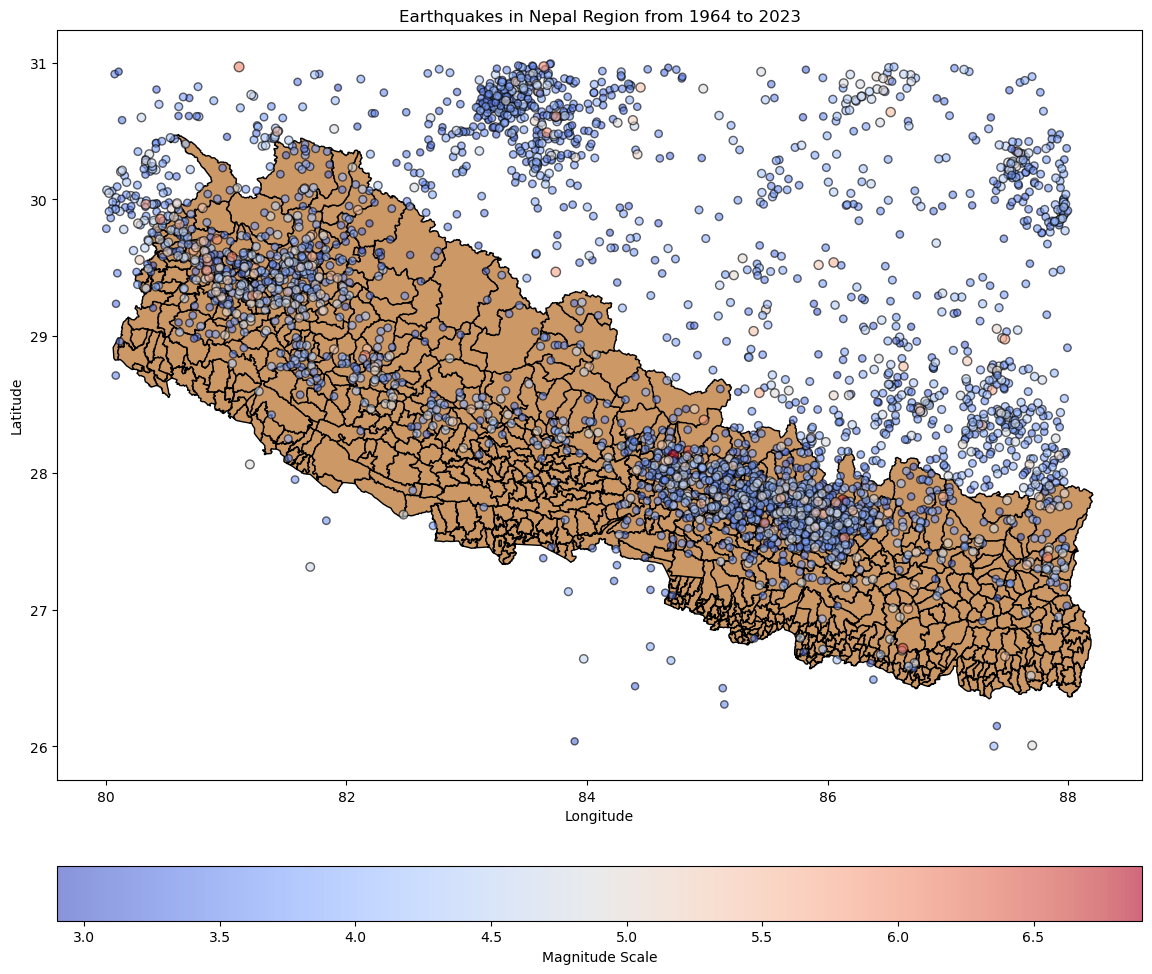

In [4]:


import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the earthquake data
df = pd.read_csv('NepaleqdataNew.csv')

# Reverse the dataframe to have chronological order if needed
df = df.iloc[::-1]

# Ensure column names are trimmed of any leading/trailing spaces
df.columns = df.columns.str.strip()

# Load the shapefile for Nepal (replace with your actual path)
nepal_shapefile = gpd.read_file('local_unit.shp')

# Plotting function
def plot_earthquakes_on_map(data, shapefile, save_path=None):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(14, 14))  # Adjust figure size as needed

    # Plot the shapefile for Nepal
    shapefile.plot(ax=ax, color='#cc9966', edgecolor='black')

    # Scatter plot of earthquake data
    sc = ax.scatter(data['LON'], data['LAT'], s=data['MAG'] * 8, c=data['MAG'], cmap='coolwarm', alpha=0.6, edgecolors='k')

    # Add labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Earthquakes in Nepal Region from 1964 to 2023')

    # Add colorbar horizontally below the map
    cb = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.08)
    cb.set_label('Magnitude Scale')

    # Save the plot as PNG if save_path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Plot saved as {save_path}")

    # Show the plot
    plt.show()

# Plot and save as PNG
plot_earthquakes_on_map(df, nepal_shapefile, save_path='earthquakes_nepal_map.png')